# Import Event Log

In [1]:
import pandas as pd
import numpy as np
import pm4py
from pm4py.objects.conversion.log import converter as log_converter

if __name__ == "__main__":
    # Read the CSV file
    dataframe_log = pd.read_csv('../../data/logs/large_log.csv', sep=',')

    # Format the dataframe
    dataframe_log = pm4py.format_dataframe(
        dataframe_log,
        case_id='case:concept:name',
        activity_key='concept:name',
        timestamp_key='time:timestamp'
    )

    # Convert the dataframe to event log
    log = log_converter.apply(dataframe_log)

/var/folders/s_/ch_w_j2d0sqf6dbdc0_224m40000gq/T/ipykernel_2299/2919665424.py:11: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe_log = pm4py.format_dataframe(


In [2]:
dataframe_log

,concept:name,timestamp,time:timestamp,case:label,case:concept:name,org:resource,@@index,@@case_index
0,Activity A,NaN,2010-01-01 00:00:00+00:00,Attribute,1,Charles,0,0
1,Activity C,NaN,2010-01-01 00:01:00+00:00,Attribute,1,Roseanne,1,0
2,Activity D,NaN,2010-01-01 00:02:00+00:00,Attribute,1,Alpha,2,0
3,Activity E,NaN,2010-01-01 00:04:00+00:00,Attribute,1,Brian,3,0
4,Activity G,NaN,2010-01-01 00:05:00+00:00,Attribute,1,Sandra,4,0
...,...,...,...,...,...,...,...,...
57519,Activity AL,NaN,2010-12-01 12:15:00+00:00,normal,999,Lourdes,57519,4999
57520,Activity AO,NaN,2010-12-01 12:17:00+00:00,normal,999,Ronald,57520,4999
57521,Activity AM,NaN,2010-12-01 12:18:00+00:00,normal,999,Steve,57521,4999
57522,Activity AP,NaN,2010-12-01 12:20:00+00:00,normal,999,Emily,57522,4999


# Preprocessing

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: One-Hot Encoding of Activities
mlb = MultiLabelBinarizer()
traces = dataframe_log.groupby('@@case_index')['concept:name'].apply(list)
one_hot_encoded = mlb.fit_transform(traces)

In [4]:
one_hot_encoding = np.array(one_hot_encoded.tolist())

# Input Traces

In [5]:
# Step 2: Group by case_index and concatenate the activities to form traces
dataframe_log['trace'] = dataframe_log.groupby('@@case_index')['concept:name'].transform(lambda x: ', '.join(x))

# Step 3: Count occurrences of each unique trace
trace_counts = dataframe_log['trace'].value_counts()

# Step 4: Convert to DataFrame and sort by occurrences
trace_counts_df = trace_counts.reset_index()
trace_counts_df.columns = ['Trace', 'Count']
trace_counts_df = trace_counts_df.sort_values(by='Count', ascending=False)


In [6]:
top_3_traces = trace_counts_df.head(11)

trace1 = top_3_traces.iloc[0]['Trace']
trace1 = [event.strip() for event in trace1.split(',')]

trace2 = top_3_traces.iloc[1]['Trace']
trace2 = [event.strip() for event in trace2.split(',')]

trace3 = top_3_traces.iloc[2]['Trace']
trace3 = [event.strip() for event in trace3.split(',')]

trace4 = top_3_traces.iloc[3]['Trace']
trace4 = [event.strip() for event in trace4.split(',')]

trace5 = top_3_traces.iloc[4]['Trace']
trace5 = [event.strip() for event in trace5.split(',')]

trace6 = top_3_traces.iloc[5]['Trace']
trace6 = [event.strip() for event in trace6.split(',')]

trace7 = top_3_traces.iloc[6]['Trace']
trace7 = [event.strip() for event in trace7.split(',')]

trace8 = top_3_traces.iloc[7]['Trace']
trace8 = [event.strip() for event in trace8.split(',')]

trace9 = top_3_traces.iloc[8]['Trace']
trace9 = [event.strip() for event in trace9.split(',')]

trace10 = top_3_traces.iloc[9]['Trace']
trace10 = [event.strip() for event in trace10.split(',')]

In [7]:
trace1

['Activity A',
 'Activity C',
 'Activity D',
 'Activity E',
 'Activity H',
 'Activity F',
 'Activity I',
 'Activity O',
 'Activity P',
 'Activity J',
 'Activity B']

In [8]:
trace6

['Activity A',
 'Activity AB',
 'Activity AF',
 'Activity AC',
 'Activity AG',
 'Activity AI',
 'Activity AH',
 'Activity AL',
 'Activity AN',
 'Activity AM',
 'Activity AP',
 'Activity B']

In [9]:
trace9

['Activity A',
 'Activity Q',
 'Activity R',
 'Activity S',
 'Activity T',
 'Activity U',
 'Activity V',
 'Activity Y',
 'Activity W',
 'Activity B']

In [56]:
grouped = dataframe_log.groupby('@@case_index')['concept:name'].apply(list).reset_index(name='trace')

In [57]:
def is_happy_trace(row_trace):
    predefined_traces = [trace1, trace2, trace3, trace4, trace5]
    for trace in predefined_traces:
        if row_trace == trace:
            return 1
    return 0

In [58]:
grouped['happy'] = grouped['trace'].apply(is_happy_trace)
grouped

,@@case_index,trace,happy
0,0,"[Activity A, Activity C, Activity D, Activity ...",1
1,1,"[Activity A, Activity AB, Activity AF, Activit...",0
2,2,"[Activity A, Activity C, Activity D, Activity ...",1
3,3,"[Activity A, Activity AB, Activity AF, Activit...",0
4,4,"[Activity A, Activity AB, Activity AE, Activit...",0
...,...,...,...
4995,4995,"[Activity A, Activity C, Activity D, Activity ...",1
4996,4996,"[Activity A, Activity C, Activity D, Activity ...",1
4997,4997,"[Activity A, Activity AB, Activity AE, Activit...",0
4998,4998,"[Activity A, Activity AB, Activity AF, Activit...",0


In [59]:
# Get indices of the happy traces in the results dataframe
happy_trace_indices = grouped[grouped['happy'] == 1].index.tolist()

# Extract the corresponding coordinates from the trace_representations array
happy_trace_coordinates = one_hot_encoding[happy_trace_indices]

# Extract unique coordinates
unique_happy_trace_coordinates = np.unique(happy_trace_coordinates, axis=0)

# Assuming the size of unique_happy_trace_coordinates is 3
#happy_trace1, happy_trace2, happy_trace3 = unique_happy_trace_coordinates
happy_trace1, happy_trace2, happy_trace3, happy_trace4, happy_trace5 = unique_happy_trace_coordinates

# Distance Measurement

In [60]:
from scipy.spatial.distance import euclidean

# Calculate the distances to each of the happy traces for every trace representation
distances_to_happy_traces = []

for trace_representation in one_hot_encoding:
    distances = [
        euclidean(trace_representation, happy_trace1),
        euclidean(trace_representation, happy_trace2),
        euclidean(trace_representation, happy_trace3),
        euclidean(trace_representation, happy_trace4),
        euclidean(trace_representation, happy_trace5)
    ]
    distances_to_happy_traces.append(distances)

# Calculate the average distance to the happy traces for each trace representation
avg_distances = [np.mean(distances) for distances in distances_to_happy_traces]

# Save the distances in a variable
avg_distances_var = np.array(avg_distances)

# Ground Truth

In [61]:
def generate_alignments_adjusted_tracecost_pkl(log, net, initial_marking, final_marking):
    from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
    from pm4py.algo.conformance.alignments.petri_net import variants
    from pm4py.objects.petri_net.utils import align_utils
    max_events=0
    for trace in log:
        counter=0
        for event in trace:
            counter+=1
        if counter > max_events:
            max_events=counter
    parameters={}
    parameters[alignments.Variants.VERSION_STATE_EQUATION_A_STAR.value.Parameters.PARAM_SYNC_COST_FUNCTION] = list(map(lambda i: .1*i, range(max_events*2)))
    parameters[alignments.Variants.VERSION_STATE_EQUATION_A_STAR.value.Parameters.PARAM_TRACE_COST_FUNCTION]=list(map(lambda i: align_utils.STD_MODEL_LOG_MOVE_COST-.1*i, range(max_events*2)))
    aligned_traces = alignments.apply_log(log, net, initial_marking, final_marking, variant=variants.state_equation_a_star, parameters=parameters)
    return aligned_traces

In [62]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.bpmn.importer import importer as bpmn_importer
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments_petri

# 2. Import the given BPMN model
bpmn_graph = bpmn_importer.apply("../../data/model/large.bpmn")

# 3. Convert the BPMN to a Petri net
net, initial_marking, final_marking = pm4py.convert_to_petri_net(bpmn_graph)

aligned_traces = generate_alignments_adjusted_tracecost_pkl(log, net, initial_marking, final_marking)

aligning log, completed variants ::   0%|          | 0/1145 [00:00<?, ?it/s]

In [63]:
def extract_conformance_status_by_fitness(aligned_traces):
    conformance_status = []
    for alignment in aligned_traces:
        fitness = alignment['fitness']
        # If the fitness is 1.0, the trace is conforming
        if fitness == 1.0:
            conformance_status.append(1)
        else:
            conformance_status.append(0)
    return conformance_status

# Get the conformance status list from the aligned traces
conformance = extract_conformance_status_by_fitness(aligned_traces)

# Results overview

In [64]:
results = pd.DataFrame(grouped['trace'])

conformity_array = conformance
results['conform'] = conformity_array

results['distance'] = avg_distances_var

results

,trace,conform,distance
0,"[Activity A, Activity C, Activity D, Activity ...",1,1.662639
1,"[Activity A, Activity AB, Activity AF, Activit...",1,4.358899
2,"[Activity A, Activity C, Activity D, Activity ...",1,1.572741
3,"[Activity A, Activity AB, Activity AF, Activit...",1,4.358899
4,"[Activity A, Activity AB, Activity AE, Activit...",1,4.358899
...,...,...,...
4995,"[Activity A, Activity C, Activity D, Activity ...",1,1.662639
4996,"[Activity A, Activity C, Activity D, Activity ...",1,1.779796
4997,"[Activity A, Activity AB, Activity AE, Activit...",1,4.358899
4998,"[Activity A, Activity AB, Activity AF, Activit...",1,4.358899


In [65]:
# Normalization function
def normalize_column(df, column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    df[column_name] = (df[column_name] - min_val) / (max_val - min_val)
    return df

# Normalize the specific column
results = normalize_column(results, 'distance')

# (Check if input traces = conform)

In [66]:
check = pd.DataFrame(results['conform'])
check['happy'] = grouped['happy']

In [67]:
# Check if there is any row where happy = 1 but conform = 0
condition = (check['happy'] == 1) & (check['conform'] == 0)
result = check[condition]

# Check if the condition is met and print the result
if not result.empty:
    print("There is at least one non conform input trace")
    print(result)
else:
    print("Input Traces conform")


Input Traces conform


# Evaluation

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


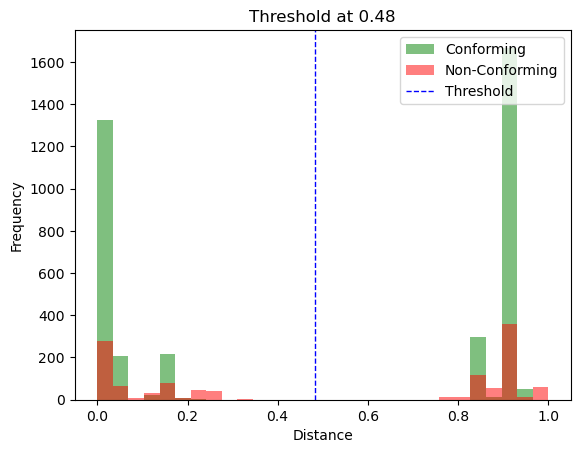

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Filter the DataFrame into conforming and non-conforming subsets
conforming_distances = results[results['conform'] == 1]['distance']
non_conforming_distances = results[results['conform'] == 0]['distance']

# Determine common bin edges
min_distance = min(results['distance'])
max_distance = max(results['distance'])
bin_edges = np.linspace(min_distance, max_distance, num=30)

# Combine the data and reshape for k-means
all_distances = results['distance']
all_distances = np.array(all_distances)
all_distances_reshaped = all_distances.reshape(-1, 1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_distances_reshaped)
kmeans_labels = kmeans.labels_

# Find the threshold as the average of the two cluster centers
threshold_value = np.mean(kmeans.cluster_centers_)

# Plot histograms and the threshold
plt.hist(conforming_distances, bins=bin_edges, alpha=0.5, label='Conforming', color='green')
plt.hist(non_conforming_distances, bins=bin_edges, alpha=0.5, label='Non-Conforming', color='red')
plt.axvline(threshold_value, color='blue', linestyle='dashed', linewidth=1, label='Threshold')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title(f'Threshold at {threshold_value:.2f}')

plt.savefig('Model_A_Threshold.png', dpi=300, bbox_inches='tight')

plt.show()

In [69]:
true_positive = np.sum(results[results['conform'] == 1]['distance'] < threshold_value)
true_negative = np.sum(results[results['conform'] == 0]['distance'] > threshold_value)
false_positive = np.sum(results[results['conform'] == 0]['distance'] < threshold_value)
false_negative = np.sum(results[results['conform'] == 1]['distance'] > threshold_value)

In [70]:
# Calculate accuracy
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.483


In [71]:
# Calculate f1

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

f1 = 2 * ((precision * recall) / (precision + recall))
print(f"F1: {f1:.3f}")

F1: 0.580


# Dev (Non Conform Traces)

In [72]:
# Calculate precision
precision = true_negative / (true_negative + false_negative)
print(f"Precision: {precision:.3f}")

Precision: 0.237


In [73]:
# Calculate recall
recall = true_negative / (true_negative + false_positive)
print(f"Recall: {recall:.3f}")

Recall: 0.530


# No Dev (Conform Traces)

In [38]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print(f"Precision: {precision:.3f}")

Precision: 0.762


In [39]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
print(f"Recall: {recall:.3f}")

Recall: 0.468


# AUC_ROC

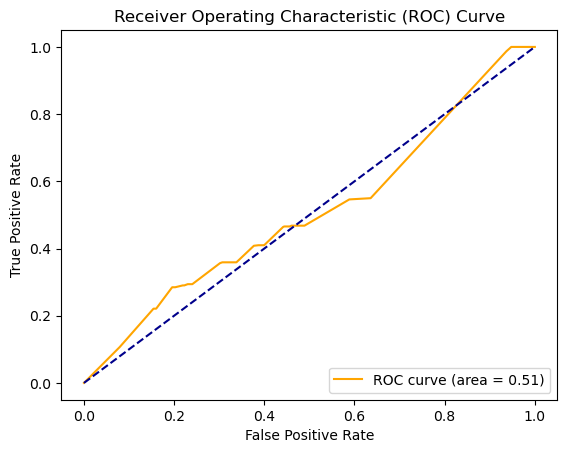

ROC AUC: 0.508


In [40]:
# UPDATED

import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame and 'distance' is the score to predict conformity

# Inverting the 'distance' scores because higher scores indicate non-conformity
# We invert the scores for ROC AUC calculation because roc_auc_score expects higher values
# to indicate higher likelihood of the positive class
inverted_scores = 1 - results['distance']

# Calculate the ROC curve and AUC using inverted scores
fpr, tpr, thresholds = roc_curve(results['conform'], inverted_scores, pos_label=1)
roc_auc = roc_auc_score(results['conform'], inverted_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC
print(f"ROC AUC: {roc_auc:.3f}")